## Import Dataset

In [2]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_dir = "gdrive/My Drive/rusantara_dataset"
data_dir = pathlib.Path(data_dir)

## Spliting the Data

In [4]:
#split dataset
!pip install split-folders

import splitfolders  # or import split_folders

input_folder = '/content/gdrive/MyDrive/rusantara_dataset'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="rusantara3", 
                   seed=42, ratio=(.8, .2), 
                   group_prefix=None) # default values


# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# enable oversampling of imbalanced datasets, works only with fixed
# splitfolders.fixed(input_folder, output="rusantara2", 
#                   seed=42, fixed=(35, 20), 
#                   oversample=False, group_prefix=None)

Copying files: 936 files [00:21, 43.30 files/s]


In [5]:
import os

BASE_DIR = './rusantara3'
print('BASE_DIR contains ', os.listdir(BASE_DIR))
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'val')

BASE_DIR contains  ['train', 'val']


## Impoting data

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [30]:
#Read the data from the dataset
train_generator = train_datagen.flow_from_directory(
    './rusantara3/train',
    target_size= (160, 160),
    batch_size=32,
    class_mode='binary')

Found 719 images belonging to 5 classes.


In [31]:
# Preprocessing the test set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Reading the test set
validation_generator = validation_datagen.flow_from_directory(
    './rusantara3/val',
    target_size= (160, 160),
    batch_size=32,
    class_mode='binary')

Found 182 images belonging to 5 classes.


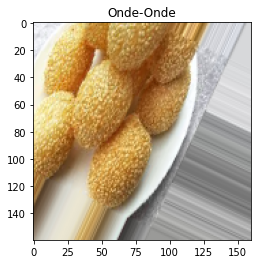

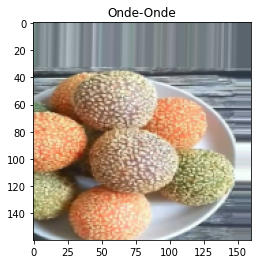

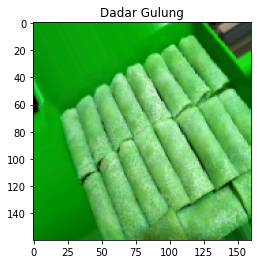

In [19]:
import matplotlib.pyplot as plt

class_names = ["Dadar Gulung", "Kue Lemper", "Kue Lumpur", "Lapis Legit", "Onde-Onde"]

x,y = train_generator.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.title(class_names[int(label)])
    plt.imshow(image)
    plt.show()

## CNN Model

In [32]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                             input_shape=(160, 160, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(5, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 79, 79, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 64)      

In [34]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
       metrics=['accuracy'])

In [37]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator)

Epoch 1/10
23/23 [==============================] - 8s 350ms/step - loss: 0.3579 - accuracy: 0.8748 - val_loss: 0.3298 - val_accuracy: 0.9011
Epoch 2/10
23/23 [==============================] - 8s 337ms/step - loss: 0.2911 - accuracy: 0.8832 - val_loss: 0.5102 - val_accuracy: 0.8571
Epoch 3/10
23/23 [==============================] - 8s 323ms/step - loss: 0.3683 - accuracy: 0.8693 - val_loss: 0.5365 - val_accuracy: 0.8242
Epoch 4/10
23/23 [==============================] - 7s 326ms/step - loss: 0.3274 - accuracy: 0.8873 - val_loss: 0.3658 - val_accuracy: 0.9066
Epoch 5/10
23/23 [==============================] - 9s 407ms/step - loss: 0.3607 - accuracy: 0.8873 - val_loss: 0.3740 - val_accuracy: 0.9011
Epoch 6/10
23/23 [==============================] - 8s 327ms/step - loss: 0.2902 - accuracy: 0.8999 - val_loss: 0.4103 - val_accuracy: 0.8791
Epoch 7/10
23/23 [==============================] - 8s 335ms/step - loss: 0.3730 - accuracy: 0.8832 - val_loss: 0.3683 - val_accuracy: 0.8901
Epoch 

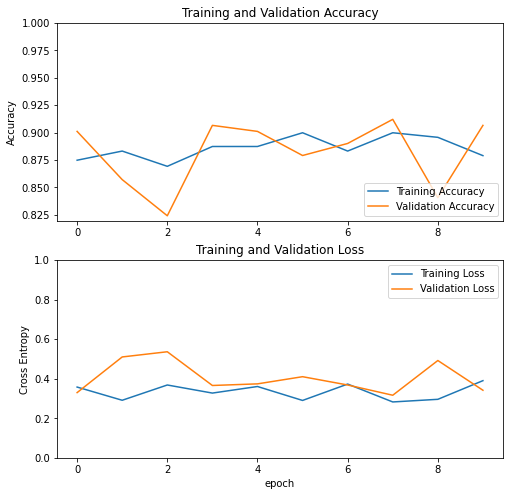

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## SAVE MODEL

In [ ]:
model.save_weights('My_model.h5')
model.load_weights('My_model.h5')

## Predicting New Data

In [ ]:
#path = '/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/onde1.jfif'

In [ ]:

#from tensorflow.keras.preprocessing import image
#import numpy as np

# loads the image and resizes
#img = image.load_img(path, target_size=(300, 300))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)

In [ ]:
#img

In [ ]:
#classes = model.predict(x)
#if classes[0]>0.5:
#    print(" Image is a human")
#else:
#    print(" Image is a horse")

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# PREDICT ONDE-ONDE

path = "/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/onde2.jfif"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])


/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/onde2.jfif
[[0. 0. 0. 1. 0.]]
Lapis Legit


In [44]:
# PREDICT LAPIS LEGIT

path = "/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lapislegit1.jfif"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lapislegit1.jfif
[[0. 0. 0. 1. 0.]]
Lapis Legit


In [48]:
# PREDICT LEMPER

path = "/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lemper3.jfif"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lemper3.jfif
[[0. 1. 0. 0. 0.]]
Kue Lemper


In [51]:
# PREDICT DADAR GULUNG

path = "/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/dadar3.jfif"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/dadar3.jfif
[[1. 0. 0. 0. 0.]]
Dadar Gulung


In [55]:
# PREDICT LUMPUR

path = "/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lumpur3.jfif"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

/content/gdrive/MyDrive/rusantara_dataset/predict_NewData/lumpur3.jfif
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6917855e-13 0.0000000e+00]]
Dadar Gulung
